# Assignment 5: Model Selection for KNN

In [19]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In this assignment, you will:

1. Load the "cell2celltrain" data set.
2. Perform a grid search to identify and fit a cross-validated optimal KNN classifier. 
3. Fit the optimal KNN classifier to the training data and make predictions on the test data.
4. Display a confusion matrix for the model.
5. Plot a precision-recall curve for the model.


<b>Note</b>: Some of the evaluation metrics we will be using are suited for binary classification models that produce probabilities. For this reason, we will be using `predict_proba()` method to produce class label probability predictions. Recall that KNN is *not* a probabilistic method. Because of this, `predict_proba()` does not output true probabilities. What it does is the following: For n_neighbors=$k$, it identifies the closest $k$ points to a given input point. It then counts up the likelihood, among these $k$ points, of belonging to one of the classes and uses that as the class "probabilities." We will be using KNN for the sake of demonstrating how to use these evaluation metrics.

**<font color='red'>Note: Some of the code cells in this notebook may take a while to run.</font>**

## Part 1: Load the Data Set

We will work with the "cell2celltrain" data set. This data set is already preprocessed, with the proper formatting, outliers, and missing values taken care of, and all numerical columns scaled to the [0, 1] interval. One-hot encoding has been performed on all categorical columns. Run the cell below to load the data set and save it to DataFrame `df`.

In [20]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")

**Task**: Load the data and save it to DataFrame `df`.

In [21]:
df = pd.read_csv(filename, header=0)

## Part 2: Create Training and Test Data Sets

### Create Labeled Examples 

<b>Task</b>: Create labeled examples from DataFrame `df`. 
In the code cell below, carry out the following steps:

* Get the `Churn` column from DataFrame `df` and assign it to the variable `y`. This will be our label.
* Get all other columns from DataFrame `df` and assign them to the variable `X`. These will be our features. 

In [22]:
y = df['Churn']
X = df.drop(columns="Churn", axis=1)

### Split Labeled Examples Into Training and Test Sets

<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. 

1. Use Scikit-learn's `train_test_split()` function to create the data sets.

2. Specify:
    * A test set that is 10 percent of the size of the data set.
    * A seed value of '1234'. 
    


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=123)

In [24]:
X_train.head()

,CustomerID,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,Married_False,Married_True,Married_nan
7532,3059250,False,False,False,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33349,3265710,False,True,True,False,False,True,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36091,3288178,False,False,True,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36216,3289250,False,False,True,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12199,3096178,False,True,True,False,False,True,True,True,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Part 3: Perform KNN Model Selection Using `GridSearchSV()`

Our goal is to find the optimal choice of hyperparameter $K$. 

### Set Up a Parameter Grid 

<b>Task</b>: Create a dictionary called `param_grid` that contains 10 possible hyperparameter values for $K$. The dictionary should contain the following key/value pair:

* A key called 'n_neighbors' 
* A value which is a list consisting of 10 values for the hyperparameter $K$ 

For example, your dictionary would look like this: `{'n_neighbors': [1, 2, 3,..]}`

The values for hyperparameter $K$  will be in a range that starts at $2$ and ends with $\sqrt{num\_examples}$, where `num_examples` is the number of examples in our training set `X_train`. Use the NumPy [np.linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function to generate these values, then convert each value to an `int`.

In [26]:
num_examples = np.linspace(2,214,10,dtype='int')
param_grid = {'n_neighbors':num_examples}

param_grid

{'n_neighbors': array([  2,  25,  49,  72,  96, 119, 143, 166, 190, 214])}

### Perform Grid Search Cross-Validation

<b>Task:</b> Use `GridSearchCV` to search over the different values of hyperparameter $K$ to find the one that results in the best cross-validation (CV) score.

Complete the code in the cell below.

In [27]:
print('Running Grid Search...')

# 1. Create a KNeighborsClassifier model object without supplying arguments. 
#    Save the model object to the variable 'model'
model = KNeighborsClassifier()

# 2. Run a grid search with 5-fold cross-validation and assign the output to the object 'grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 5
grid = GridSearchCV(model, param_grid, cv=5)

# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'grid_search'
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


<b>Task</b>: Retrieve the value of the hyperparameter $K$ for which the best score was attained. Save the result to the variable `best_k`.

In [29]:
best_k = grid_search.best_params_
best_k

{'n_neighbors': 119}

## Part 4: Fit the Optimal KNN Model and Make Predictions

<b>Task</b>: Initialize a `KNeighborsClassifier` model object with the best value of hyperparameter `K` and fit the model to the training data. The model object should be named `model_best`.

In [33]:
# 1. Create the  model object below and assign to variable 'model_best'
model_best = KNeighborsClassifier(n_neighbors = 119)

# 2. Fit the model to the training data below
model_best.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=119, p=2,
                     weights='uniform')

<b>Task:</b> Test your model on the test set (`X_test`).

1. Use the ``predict_proba()`` method  to use the fitted model `model_best` to predict class probabilities for the test set. Note that the `predict_proba()` method returns two columns, one column per class label. The first column contains the probability that an unlabeled example belongs to class `False` (Churn is "False") and the second column contains the probability that an unlabeled example belongs to class `True` (Churn is "True"). Save the values of the *second* column to a list called ``probability_predictions``.

2. Use the ```predict()``` method to use the fitted model `model_best` to predict the class labels for the test set. Store the outcome in the variable ```class_label_predictions```. Note that the `predict()` method returns the class label (True or False) per unlabeled example.

In [34]:
# 1. Make predictions on the test data using the predict_proba() method
probability_predictions = model_best.predict_proba(X_test)[:,1]

# 2. Make predictions on the test data using the predict() method 
class_label_predictions = model_best.predict(X_test)

## Part 5: Evaluate the Accuracy of the Model

<b>Task</b>: Create a confusion matrix to evaluate your model. In the code cell below, perform the following steps:

1. Compute and print the model's accuracy score using `accuracy_score`.

2. Call the `confusion_matrix()` function with the arguments: 
    1. `y_test`
    2. `class_label_predictions`
    3. The parameter `labels`. Assign the parameter a list containing two items: `True` and `False`. Note: these correspond to the two possible labels contained in `class_label_predictions`.

3. Save the resulting confusion matrix to the variable `c_m`.

4. Use the Pandas `pd.DataFrame()` function to create a DataFrame out of the confusion matrix. Supply it the following arguments:
    1. The confusion matrix `c_m`
    2. The parameter `columns` with the value: `['Predicted: Customer Will Leave', 'Predicted: Customer Will Stay']`
    3. The parameter `index` with the value: `['Actual: Customer Will Leave', 'Actual: Customer Will Stay']`

In [42]:
# Compute and print the model's accuracy score
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy score: ' + str(acc_score))

# Create a confusion matrix
c_m = confusion_matrix(y_test, class_label_predictions, labels=[True, False])

# Create a Pandas DataFrame out of the confusion matrix for display
print('Confusion Matrix for the model: ')
df = pd.DataFrame(c_m, columns=['Predicted: Customer Will Leave', 'Predicted: Customer Will Stay'], index=['Actual: Customer Will Leave', 'Actual: Customer Will Stay'])
df

Accuracy score: 0.717335945151812
Confusion Matrix for the model: 


,Predicted: Customer Will Leave,Predicted: Customer Will Stay
Actual: Customer Will Leave,0,1443
Actual: Customer Will Stay,0,3662


## Part 6:  Plot the Precision-Recall Curve 

Recall that scikit-learn defaults to a 0.5 classification threshold. Sometimes we may want a different threshold. 

The precision-recall curve shows the trade-off between precision and recall for different classification thresholds. Scikit-learn's `precision_recall_curve()` function computes precision-recall pairs for different probability thresholds. For more information, consult the [Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html).

Let's first import the function.

In [43]:
from sklearn.metrics import precision_recall_curve

<b>Task:</b> You will use `precision_recall_curve()` to compute precision-recall pairs. In the code cell below, call the function with the arguments `y_test` and `probability_predictions`. The function returns three outputs. Save the three items to the variables `precision`, `recall`, and `thresholds`, respectively. 


In [44]:
precision, recall, thresholds = precision_recall_curve(y_test, probability_predictions)

The code cell below uses seaborn's `lineplot()` function to visualize the precision-recall curve. Variable `recall` will be on the $x$ axis and `precision` will be on the $y$-axis.

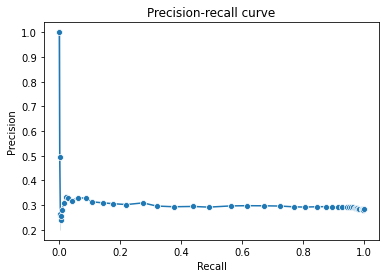

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall, y=precision, marker = 'o')

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()